## FirstCal Metrics Demo

Here we use the `FirstCal_Metrics` class within `firstcal_metrics.py` to assess the quality of firstcal solutions. Firstcal solutions are stored in `*first.calfits` files that are read on a file-by-file basis. This is only because the `pyuvadata.UVCal` class currently only supports file-by-file reading. 

In [1]:
%matplotlib inline
import numpy as np
import glob
import hera_qm

In [2]:
# get files
files = sorted(glob.glob("../hera_qm/data/*.first.calfits"))

### Example of Bad FirstCal Delay Solutions

This is an example where FirstCal solutions are *really* bad, because we involved a dead antenna (81) in the system of equations. FirstCal metrics can plot delay solutions (and save them to .png file), which we can then visually confirm the delay solutions are "bad." Here, we use the term "bad" to mean that the delay solutions fluctuate with amplitude greater than ~ 1 ns. 

In [5]:
# initialize metrics class
FM = hera_qm.firstcal_metrics.FirstCal_Metrics(files[0])

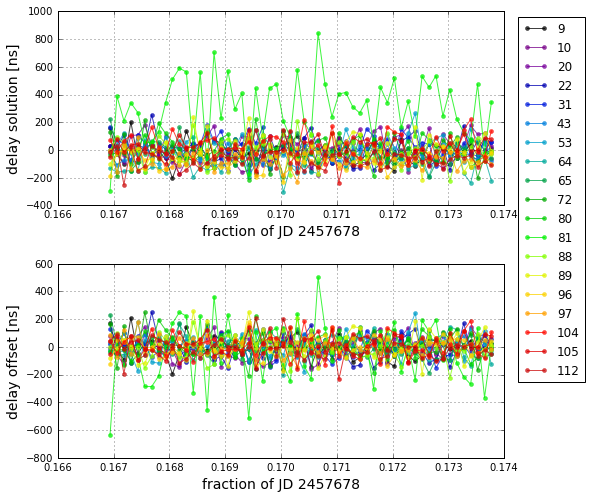

In [6]:
# inspect delay solution and their offset from the per-ant median across time
FM.plot_delays()

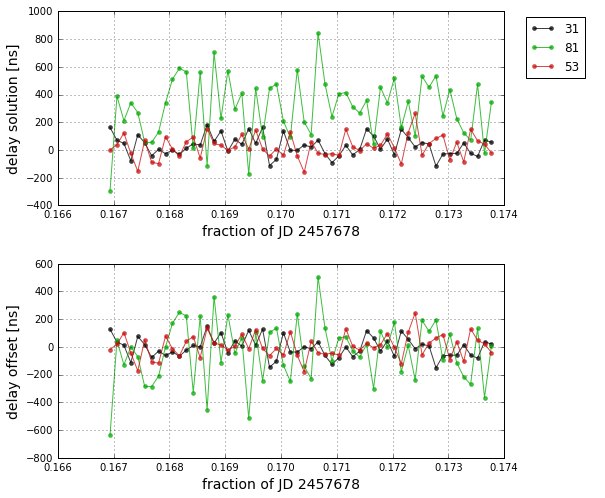

In [7]:
# inspect only a few antennas
FM.plot_delays(ants=[31, 81, 53])

We can see visually that the solutions are terrible, and in particular antenna 81 seems to be driving the behaviour.

We can also quantify how good or bad the solutions are by taking the standard deviation of the delay solution fluctuations over time. If we plot them, we see that all antennas have a significant standard deviation in their delay solutions, and in particular antenna 81 stands out. We can also plot the time-averaged absolute value each antennas z-score, which for us is the average distance from the group mean divided by the group standard deviation, per-antenna. In that case, we also see antenna 81 stand out from the others. 

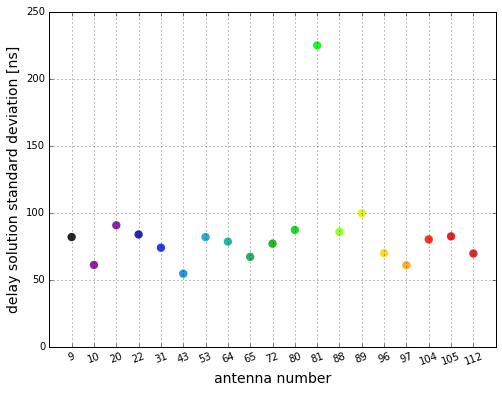

In [8]:
# plot standard deviation of delay solutions
FM.plot_stds()

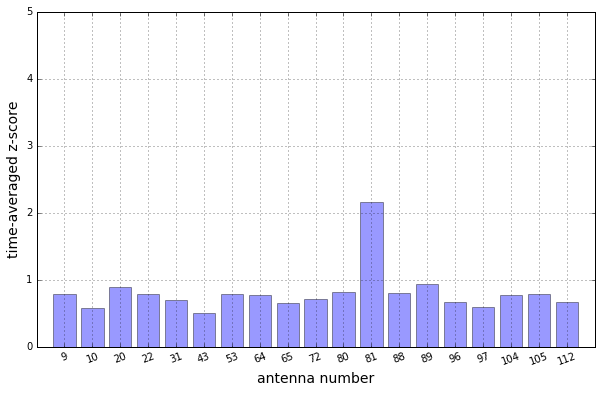

In [9]:
# plot z_scores of delay solutions
FM.plot_zscores(plot_type='time_avg')

We can also run the full suite of metrics with `FM.run_metrics()`. In doing so, the results are attached to the class and we can specify whether to additionally write the results to file or not. By default, the file is a `.json` file, but can also be specified to be a `.pkl` file.

In [10]:
# run metrics
FM.run_metrics(write=False, std_cut=0.5)

In [11]:
# full solution is either good or bad based on std_cut in ns
FM.full_sol

'bad'

In [12]:
# we can also get a list of bad firstcal solutions per-antenna based on std_cut
print(FM.bad_ants)

['9', '10', '20', '22', '31', '43', '53', '64', '65', '72', '80', '81', '88', '89', '96', '97', '104', '105', '112']


In [13]:
# run metrics and write to file
FM.run_metrics(filetype='json', write=True, std_cut=0.5)

In [14]:
# get json files
json_files = sorted(glob.glob("../hera_qm/data/*.json"))
json_files

['../hera_qm/data/zen.2457678.16694.yy.HH.uvc.bad.first.metrics.json']

### Example of Good FirstCal Delay Solutions

This is an example where FirstCal solutions are good, and is more realistic because hopefully particularly bad antennas like 81 will be flagged by the antenna metrics before entering firstcal.

In [3]:
# initialize metrics class
FM = hera_qm.firstcal_metrics.FirstCal_Metrics(files[1])

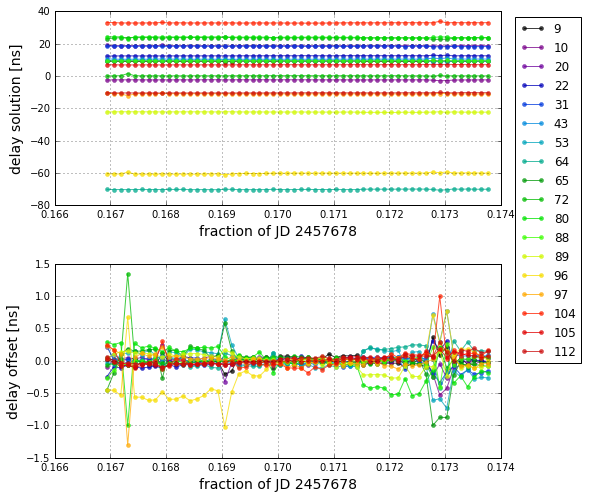

In [4]:
# inspect delays
FM.plot_delays()

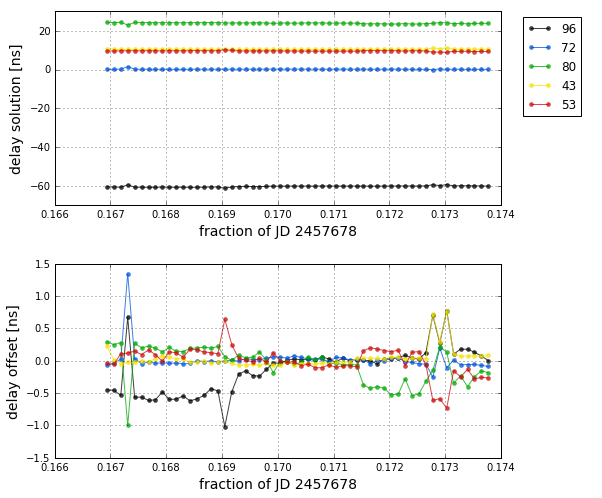

In [5]:
# inspect only a few antennas
FM.plot_delays(ants=[96, 72, 80, 43, 53])

Here we can see the delay solutions are for the most part stable over time, with the exception of a few antennas that show deviation on the ~0.5 ns scale. There are also particular times when solutions for all antennas are considerably worse than the average.

If we want to save this images to file, we can do so as well.

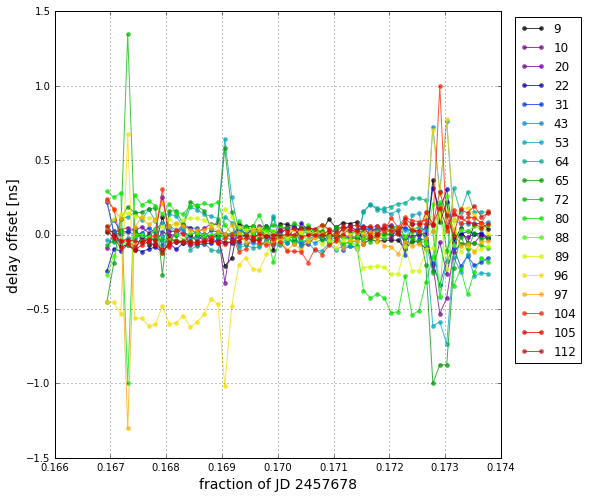

In [6]:
# inspect delays and save to file, and also only plot the delay offsets
FM.plot_delays(plot_type='offset', save=True)

In [7]:
# get png files
png_files = glob.glob("../hera_qm/data/*.png")
png_files

['../hera_qm/data/zen.2457678.16694.yy.HH.uvc.good.first.dlys.png']

Let's plot the standard deviations of the delay solutions per-antenna.

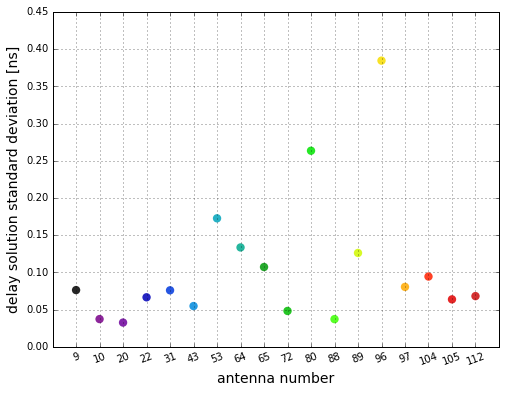

In [8]:
# plot standard deviation of delay solutions
FM.plot_stds()

We can see that all antennas have delay solution stand devs of less than 0.5 ns, which is not bad. It is apparent from this plot that, if we had to eliminate some antennas from the solution, it would first be 96, then perhaps 80. This is also apparent in the zscores.

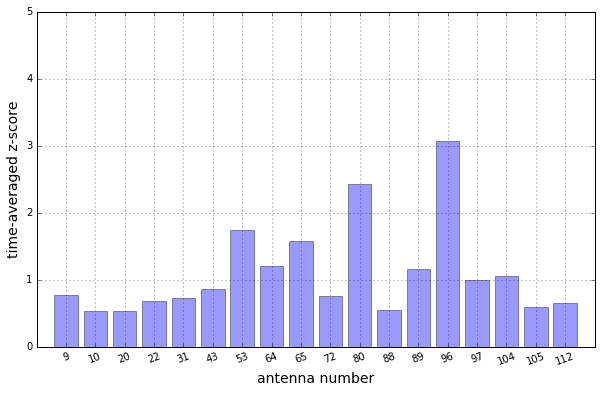

In [9]:
# plot z_scores of delay solutions
FM.plot_zscores(plot_type='time_avg')

Now let's look at some of the quantitative metrics.

In [13]:
# run metrics
FM.run_metrics(write=False, std_cut=0.5)

In [23]:
# full solution is either good or bad based on std_cut in ns
FM.full_sol

'good'

In [24]:
## we can also get a list of bad firstcal solutions per-antenna based on std_cut
print(FM.bad_ants)

[]


We see that, given our delay standard deviation hard bound of 0.5 ns, the solution as a whole is deemed 'good', and none of the antennas are deemed 'bad.' 